# Taxi V2

In [8]:
import numpy as np
from collections import defaultdict, deque
import random
import sys
import math
import gym

## Declare Agents functions

In [16]:
class Agent:
    def __init__(self, nA=6):     #Initialize agent.
        self.nA = nA
        self.Q = defaultdict(lambda: np.zeros(self.nA))
        self.gamma = 0.81
        self.alpha = 0.068
        self.eps = 0.01

    def select_action(self, state):
        if random.random() > self.eps:
            return np.argmax(self.Q[state])
        else:
            return np.random.choice(self.nA)
    #       return np.argmax(self.Q[state])

    def step(self, state, action, reward, next_state, next_action, done):
        action0_score = self.Q[state][action]
        actionNext_score = self.Q[next_state][next_action] if next_state is not None else 0  
        sarsa_factor = reward + (self.gamma * actionNext_score) 
        self.Q[state][action] += (self.alpha *(sarsa_factor - action0_score))

## Declare Agent's interaction

In [17]:
from collections import deque
import sys
import math
import numpy as np

def interact(env, agent, num_episodes=20000, window=100):
    # initialize values
    avg_rewards = deque(maxlen=num_episodes)
    # initialize best average reward
    best_avg_reward = -math.inf
    # initialize monitor for most recent rewards
    samp_rewards = deque(maxlen=window)
    # for each episode
    for i_episode in range(1, num_episodes+1):
        # begin the episode
        state = env.reset()
        # initialize the sampled reward
        samp_reward = 0      
        #GET INITIAL ACTION
        action = agent.select_action(state)   
        
        while True:
            # agent selects an action
            action = agent.select_action(state)
            # agent performs the selected action
            next_state, reward, done, _ = env.step(action)
            next_action = agent.select_action(next_state)
            # agent performs internal updates based on sampled experience
            agent.step(state, action, reward, next_state, next_action, done)
            # update the sampled reward
            samp_reward += reward
            # update the state (s <- s') to next time step
            state = next_state
            action = next_action
            if done:
                # save final sampled reward
                samp_rewards.append(samp_reward)
                break
        if (i_episode >= 100):
            # get average reward from last 100 episodes
            avg_reward = np.mean(samp_rewards)
            # append to deque
            avg_rewards.append(avg_reward)
            # update best average reward
            if avg_reward > best_avg_reward:
                best_avg_reward = avg_reward
        # monitor progress
        print("\rEpisode {}/{} || Best average reward {}".format(i_episode, num_episodes, best_avg_reward), end="")
        sys.stdout.flush()
        # check if task is solved (according to OpenAI Gym)
#         if best_avg_reward >= 9.0:
#             print('\nEnvironment solved in {} episodes.'.format(i_episode), end="")
#             break
        if i_episode == num_episodes: print('\n')
    return avg_rewards, best_avg_reward

In [20]:
env = gym.make('Taxi-v3')
agent = Agent()
avg_rewards, best_avg_reward = interact(env, agent)

Episode 20000/20000 || Best average reward 8.375



## Plot results:

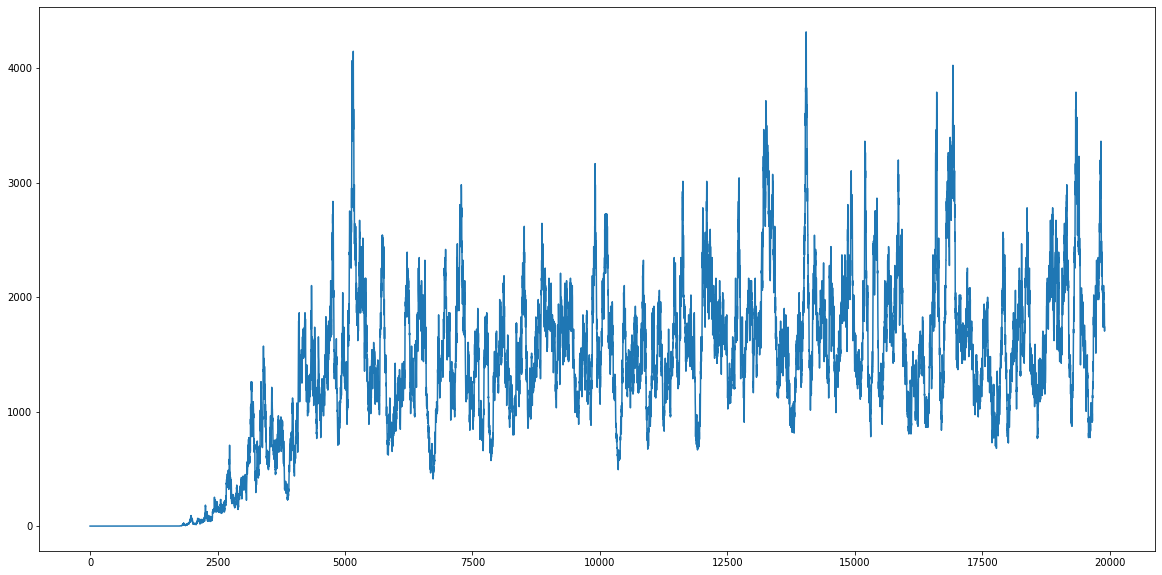

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 10))
plt.plot(np.exp(avg_rewards))
plt.show()